In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sSns 


In [26]:
df = pd.read_csv('advertising.csv')

In [27]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [28]:
if type(df) is pd.DataFrame:
    print('Yes, it is a dataframe')
else:
    print("No, it's not a dataframe")

Yes, it is a dataframe


In [29]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [31]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [32]:
#checking for null values 
df.isnull().sum()


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

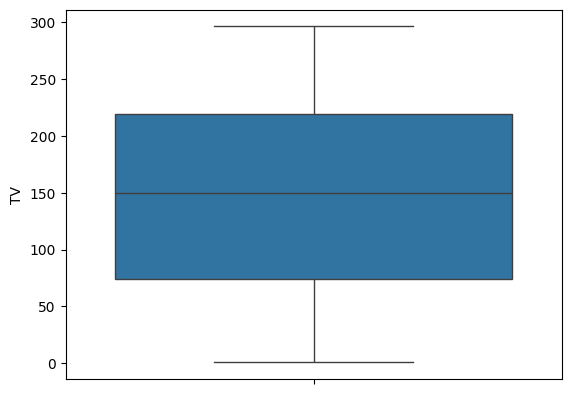

In [33]:
#checking for outliers 
plt1 = sns.boxplot(df['TV'])

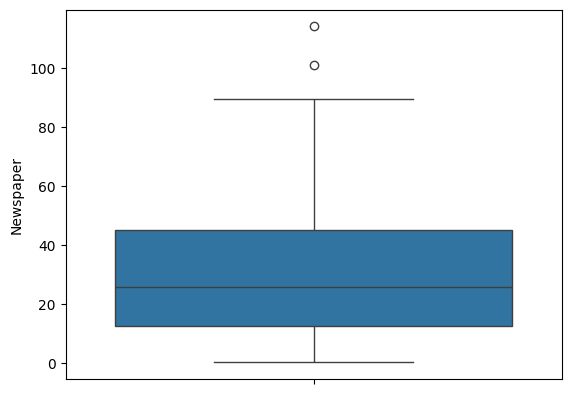

In [34]:
plt2 = sns.boxplot(df['Newspaper'])

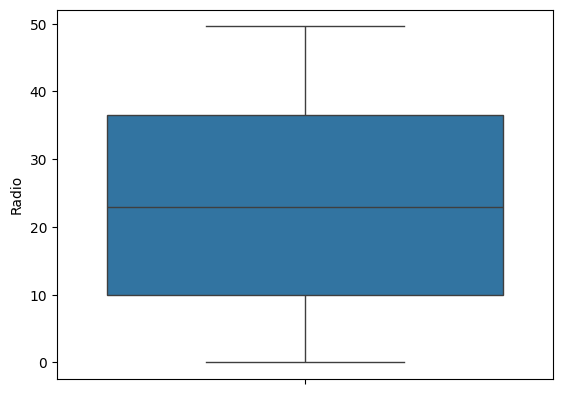

In [35]:
plt2 = sns.boxplot(df['Radio'])

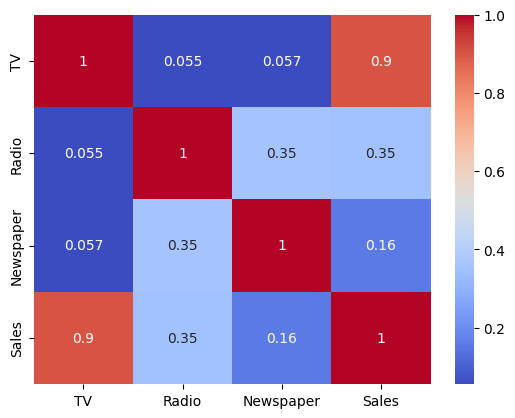

In [36]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

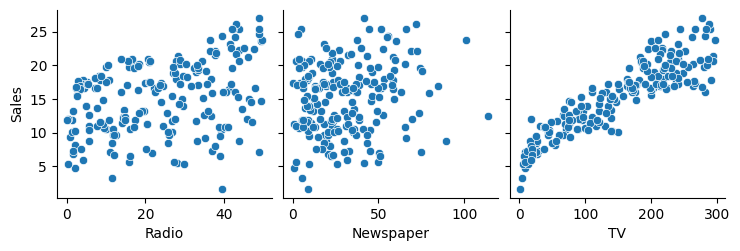

In [37]:
sns.pairplot(df, x_vars=['Radio', 'Newspaper', 'TV'], y_vars = 'Sales')
plt.show()

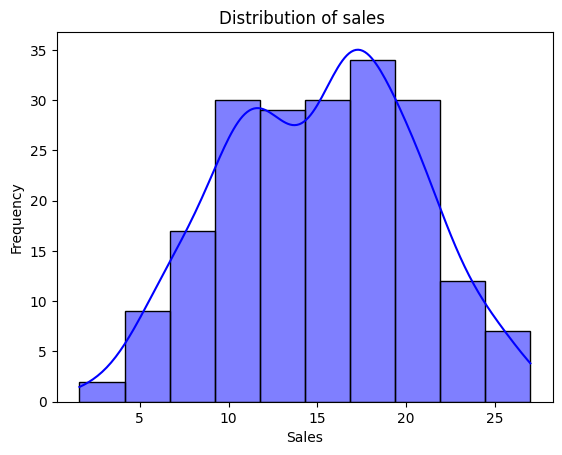

In [38]:
#understanding distribution of sales 
sns.histplot(df['Sales'], kde = True, color ='blue')
plt.title('Distribution of sales ')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [39]:
#calculating correlation between TV and Radio for potential multicollinearity
corr_matrix = df[['TV', 'Radio']].corr()
print(corr_matrix)

             TV     Radio
TV     1.000000  0.054809
Radio  0.054809  1.000000


In [40]:
x = df[['TV', 'Radio']]
y= df['Sales']


In [41]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=2)


In [42]:
len(x_train) 


140

In [43]:
len(y_train)

140

In [44]:
import statsmodels.api as sm 


In [45]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [46]:
lr.params

const    4.649193
TV       0.054481
Radio    0.108606
dtype: float64

In [47]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     747.5
Date:                Fri, 30 Aug 2024   Prob (F-statistic):           1.97e-74
Time:                        20:27:41   Log-Likelihood:                -260.10
No. Observations:                 140   AIC:                             526.2
Df Residuals:                     137   BIC:                             535.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6492      0.314     14.805      0.000       4.028       5.270
TV             0.0545      0.002     34.176      0.000       0.051       0.058
Radio          0.1086      0.009     11.969      0.000       0.091       0.127
==============================================================================
Omnibus:                        2.475   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                2.138
Skew:                          -0.143   Prob(JB):                        0.343
Kurtosis:                       3.533   Cond. No.                         402.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
#performing VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
vif_data  = pd.DataFrame()
vif_data['Variable'] = x_train.columns
vif_data['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]

In [50]:
print(vif_data)

  Variable       VIF
0       TV  2.496291
1    Radio  2.496291


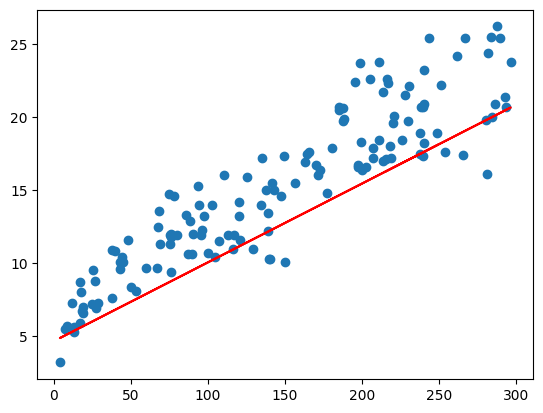

In [51]:
plt.scatter(x_train['TV'], y_train)
plt.plot(x_train['TV'], 4.65 + 0.054*x_train['TV'], 'r') # for tv 
plt.show()


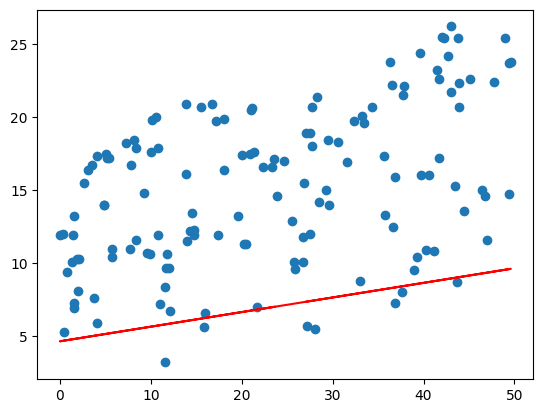

In [62]:
plt.scatter(x_train['Radio'], y_train)
plt.plot(x_train['Radio'], 4.65 + 0.10*x_train['Radio'], 'r') # for radio 
plt.show()

In [53]:
y_train_pred = lr.predict(x_train_sm)
residual = (y_train - y_train_pred)

<Figure size 640x480 with 0 Axes>

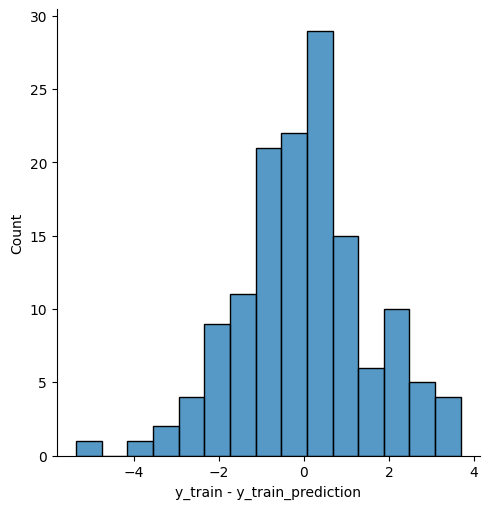

In [54]:
fig = plt.figure()
sns.displot(residual, bins = 15)
fig.suptitle('Error Term', fontsize = 15)                 
plt.xlabel('y_train - y_train_prediction', fontsize = 10)         
plt.show()

In [55]:
x_test_sm =  sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [56]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 


In [57]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

3.419383780045242


In [58]:
rmse = np.sqrt(mse)
print(rmse)

1.8491575865905108


In [59]:
r_squared = r2_score(y_test, y_pred)
print(r_squared)

0.8670708934175506


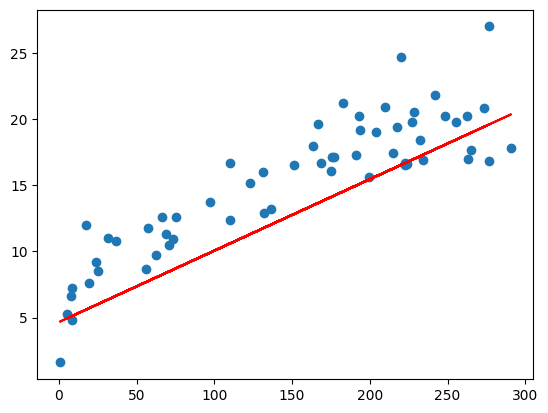

In [60]:
#visualizing fit in the test set 
plt.scatter(x_test['TV'], y_test)
plt.plot(x_test['TV'], 4.65 + 0.054*x_test['TV'], 'r') # for tv 
plt.show()

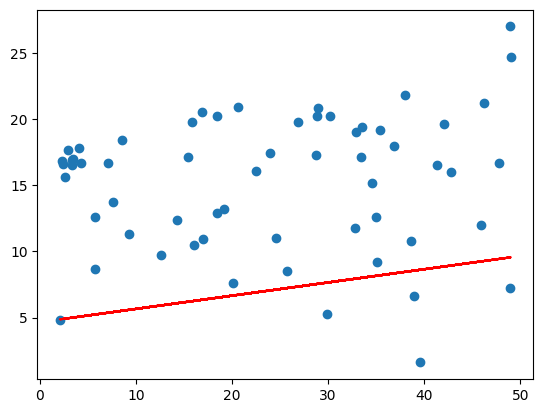

In [61]:
plt.scatter(x_test['Radio'], y_test)
plt.plot(x_test['Radio'], 4.65 + 0.10*x_test['Radio'], 'r') # for tv 
plt.show()